In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import tensorflow_datasets as tfds

In [12]:
import zipfile
import os

def unzip_file(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

zip_path = 'C:\\Users\\hp\\ml\\archive.zip'
extract_to = 'C:\\Users\\hp\\ml\\PlantVillage'

unzip_file(zip_path, extract_to)


In [5]:
##!unzip plant-village.zip -d plant-village

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
import os
import shutil

# Path to the original directory containing all classes
original_directory = "PlantVillage"

# Path to the new directory where you want to move the desired classes
new_directory = "PlantVillage_Selected"

# List of desired class names
desired_classes = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

# Create the new directory if it doesn't exist
if not os.path.exists(new_directory):
    os.makedirs(new_directory)

# Move the desired subdirectories
for class_name in desired_classes:
    src_path = os.path.join(original_directory, class_name)
    dest_path = os.path.join(new_directory, class_name)
    if os.path.exists(src_path):
        shutil.move(src_path, dest_path)
        print(f"Moved {class_name} to {new_directory}")
    else:
        print(f"Class {class_name} does not exist in {original_directory}")

print("Move operation completed.")


Moved Potato___Early_blight to PlantVillage_Selected
Moved Potato___Late_blight to PlantVillage_Selected
Moved Potato___healthy to PlantVillage_Selected
Move operation completed.


In [15]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage_Selected",
    shuffle=True,
    image_size=(256, 256),
    batch_size=32
)


Found 2152 files belonging to 3 classes.


In [16]:
class_name=dataset.class_names

In [17]:
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [18]:

IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

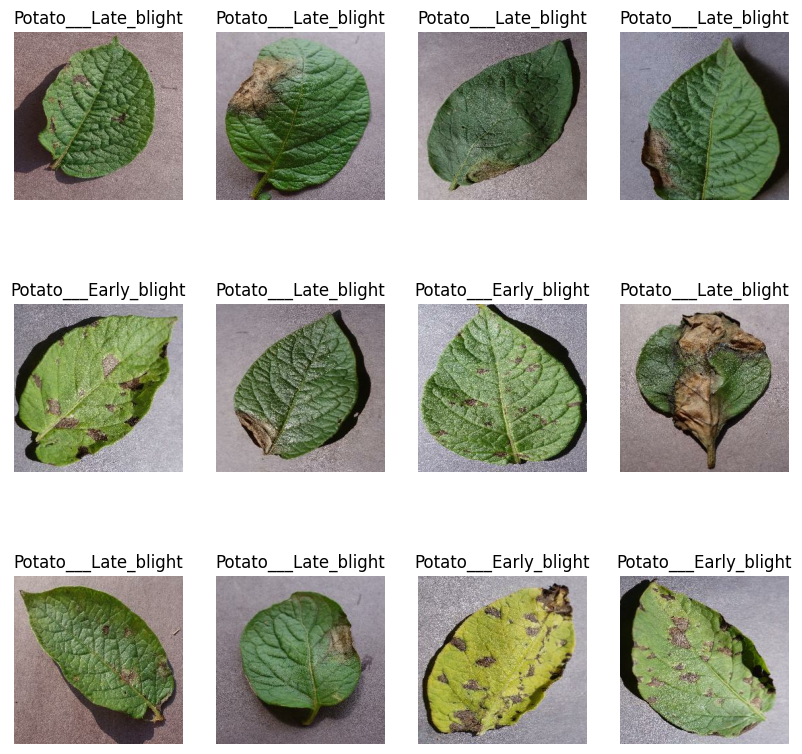

In [19]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_name[label_batch[i]])
    plt.axis("off")




In [20]:
def train_test(ds,train=0.8,val=0.1,test=0.1,shuffle=True,shuffle_size=1000):
  if shuffle:
    ds=ds.shuffle(shuffle_size,seed=12)
  size=len(ds)
  train_size=int(size*train)
  val_size=int(size*val)
  train_set=ds.take(train_size)
  val_set=ds.skip(train_size).take(val_size)
  test_set=ds.skip(train_size).skip(val_size)
  return train_set,val_set,test_set

In [21]:
train_ds,val_ds,test_ds=train_test(dataset)

In [22]:
len(train_ds)

54

In [23]:
len(val_ds)

6

In [24]:
len(test_ds)

8

In [25]:
 train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
 val_ds_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
 test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [27]:
resize_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [28]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [29]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
history=model.fit(train_ds,epochs=EPOCHS,batch_size=BATCH_SIZE,verbose=1,validation_data=val_ds)

Epoch 1/50


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 803ms/step - accuracy: 0.4607 - loss: 0.9242 - val_accuracy: 0.6198 - val_loss: 0.7853
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 42s 780ms/step - accuracy: 0.6914 - loss: 0.7005 - val_accuracy: 0.8229 - val_loss: 0.3949
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 668ms/step - accuracy: 0.8581 - loss: 0.3528 - val_accuracy: 0.9062 - val_loss: 0.2217
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 675ms/step - accuracy: 0.8931 - loss: 0.2614 - val_accuracy: 0.8802 - val_loss: 0.2942
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 674ms/step - accuracy: 0.8984 - loss: 0.2369 - val_accuracy: 0.9531 - val_loss: 0.1119
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 37s 692ms/step - accuracy: 0.9673 - loss: 0.0984 - val_accuracy: 0.9643 - val_loss: 0.0907
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 37s 695ms/step - accuracy: 0.9508 - loss: 0.1270 - val_accuracy: 0.9583 - val_loss: 0.0964
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 40s 744ms/step - accuracy: 0.9764 - loss: 0.0663 - val_accuracy: 0.947

In [33]:
model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 247ms/step - accuracy: 0.9965 - loss: 0.0074


[0.008206983096897602, 0.99609375]

In [34]:
history

In [35]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [36]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [37]:
len(history.history['accuracy'])

50

In [38]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'training and validation accuracy')

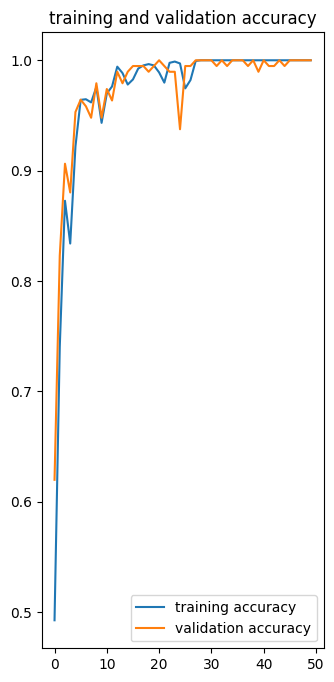

In [39]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='training accuracy')
plt.plot(range(EPOCHS),val_acc,label='validation accuracy')
plt.legend(loc='lower right')
plt.title("training and validation accuracy")

Text(0.5, 1.0, 'training and validation loss')

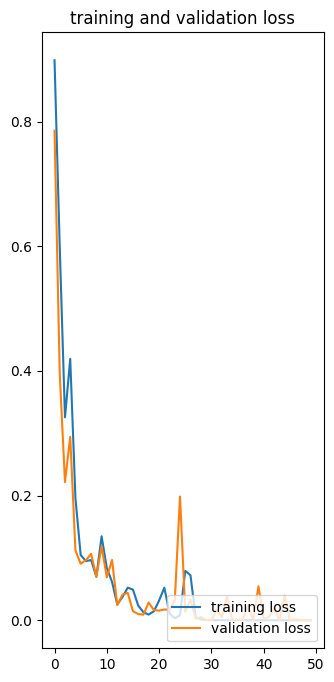

In [40]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),loss,label='training loss')
plt.plot(range(EPOCHS),val_loss,label='validation loss')
plt.legend(loc='lower right')
plt.title("training and validation loss")

first image to predict
first image label is  Potato___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step
prediction result is  Potato___healthy


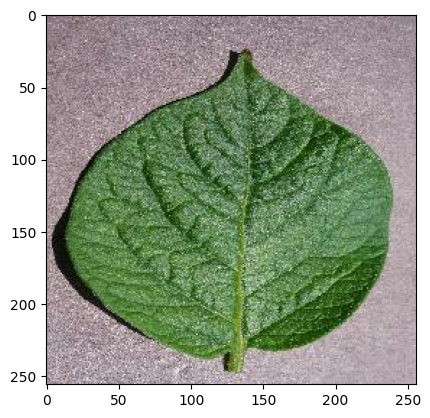

In [41]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
  first_image=(images_batch[0].numpy().astype('uint8'))
  first_label=labels_batch[0].numpy()
  print("first image to predict")
  plt.imshow(first_image)
  print("first image label is ",class_name[first_label])
  # making prediction
  batch_prediction=model.predict(images_batch)
  print("prediction result is ",class_name[np.argmax(batch_prediction[0])])

In [42]:
def predict(model,img):
  img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array=tf.expand_dims(img_array,0)
  prediction=model.predict(img_array)
  prediction_class=class_name[np.argmax(prediction[0])]
  confidence=round(100*(np.max(prediction[0])),2)
  return prediction_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


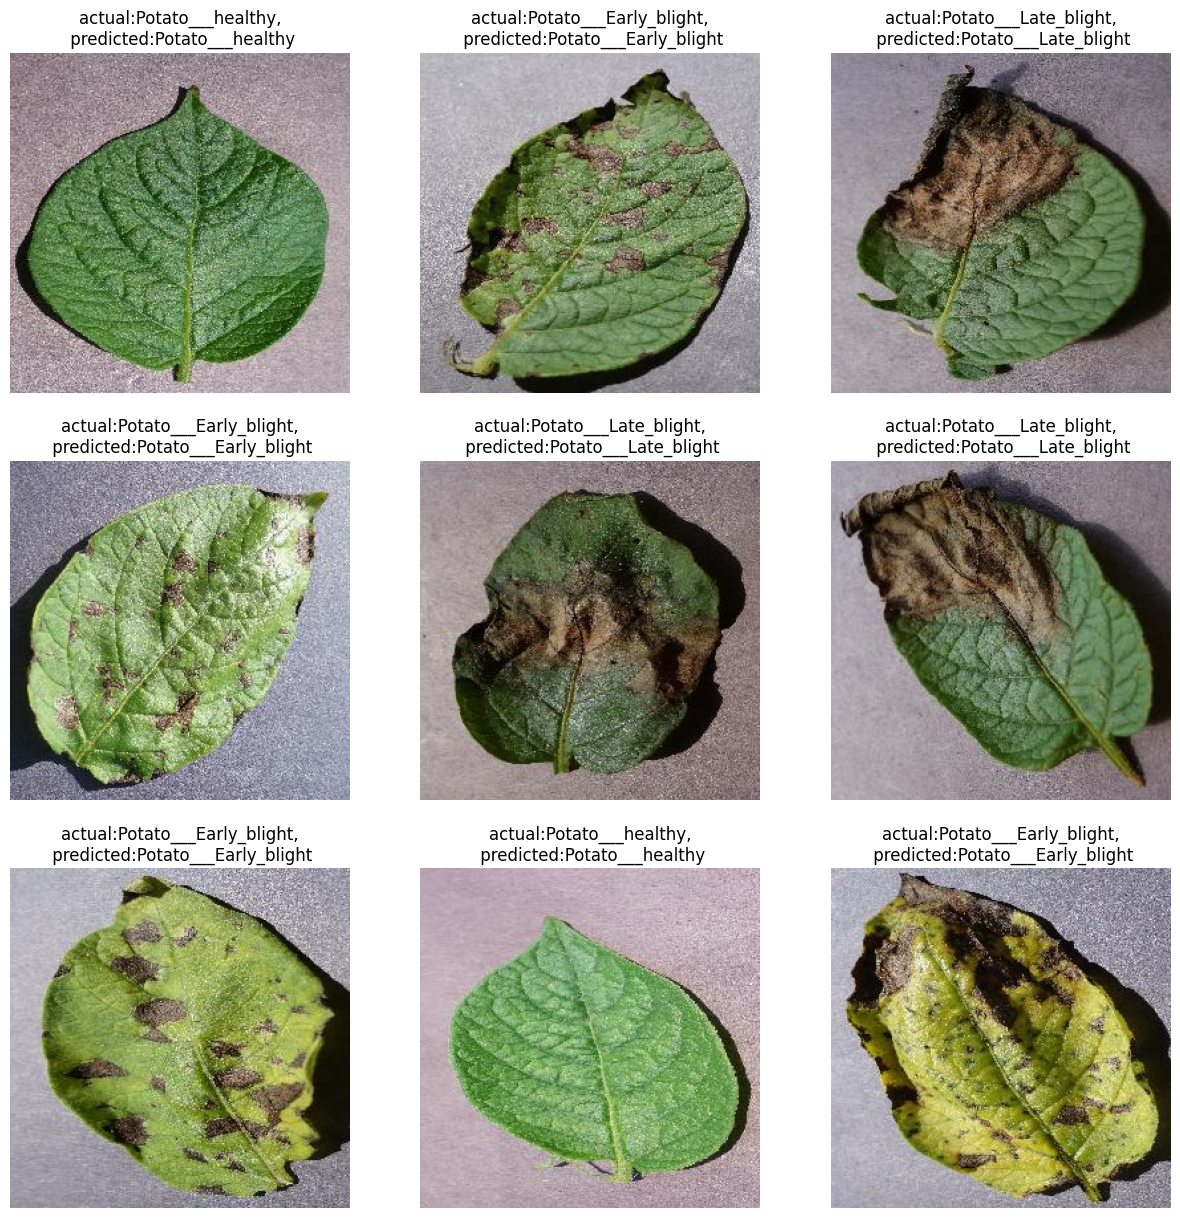

In [43]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    predicted_class,confidence=predict(model,images[i].numpy())
    actual_class=class_name[labels[i]]
    plt.title(f"actual:{actual_class},\n predicted:{predicted_class}")
    plt.axis("off")

In [49]:
import pickle

In [50]:
with open ('model','wb') as f:
    pickle.dump(model,f)

In [52]:
with open ('model','rb') as f:
    mol=pickle.load(f)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


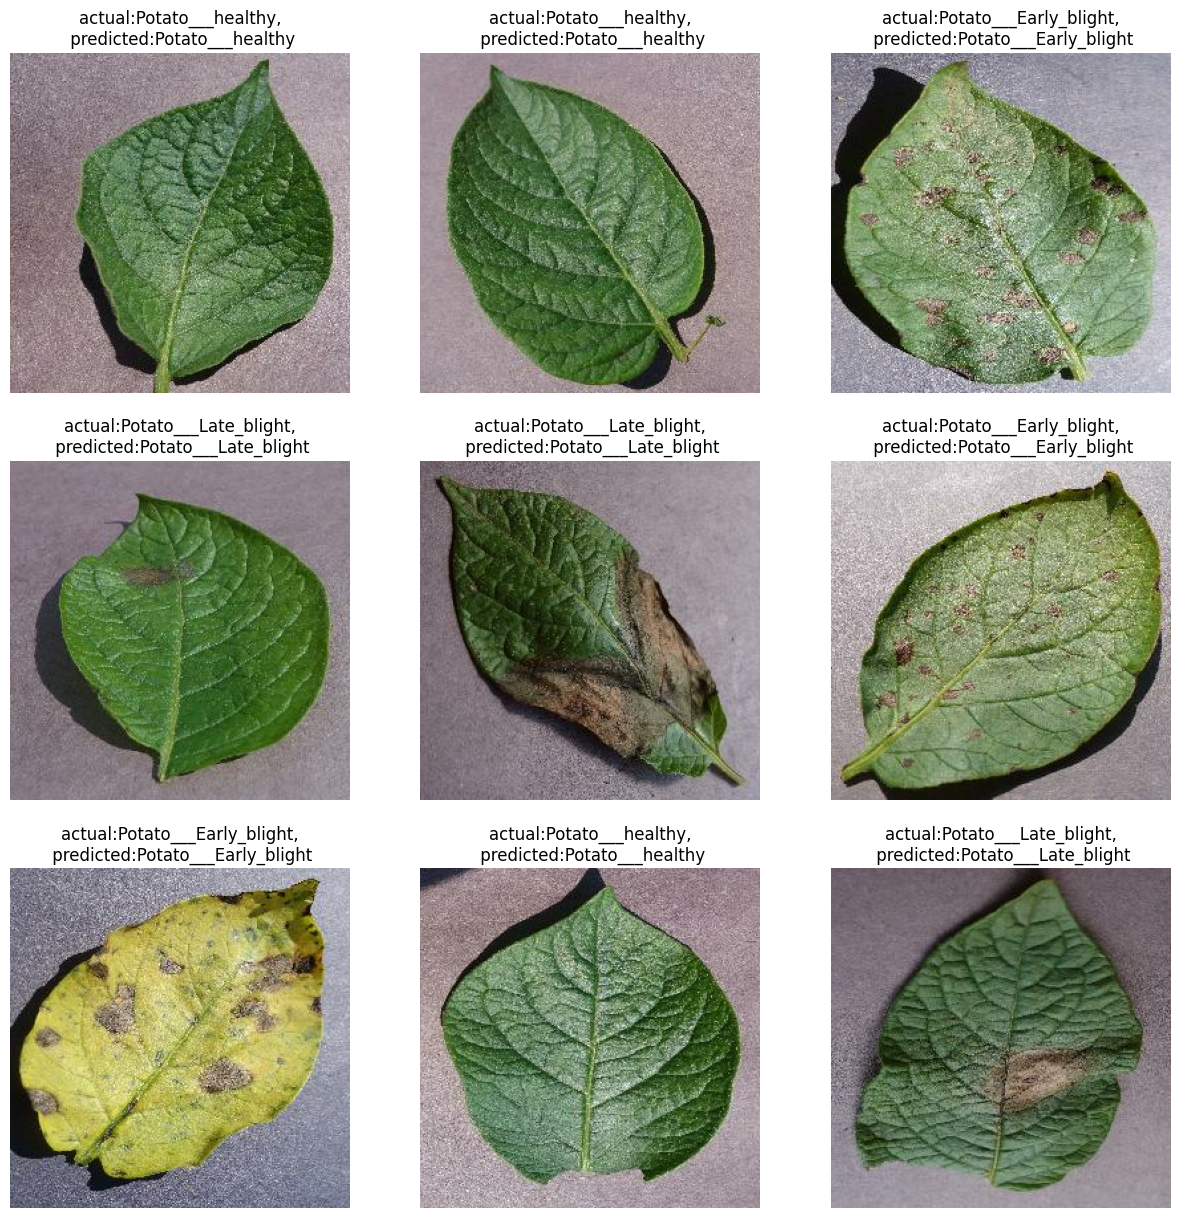

In [53]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    predicted_class,confidence=predict(mol,images[i].numpy())
    actual_class=class_name[labels[i]]
    plt.title(f"actual:{actual_class},\n predicted:{predicted_class}")
    plt.axis("off")